# 大作业二 面向对象文本分析

此次作业要求：
1. 补充完成用于表示小说和章节的类：Novel和Chapter
2. 通过继承的方式，扩展Novel和Chapter类，使其支持分词、统计每个章节词频、绘制词云图的功能
3. 通过继承的方式，进一步扩展Novel和Chapter类，使其支持统计每个章节人物出现次数、找出某个人物出现的所有章节、以及统计与人物在同一上下文中出现的词和其他任务的功能。

## 1. 补充完成用于表示小说和章节的类：Novel和Chapter

In [1]:
import os

class Chapter(object):
    
    def __init__(self, title, path, encoding='utf8'):
        """
        Chapter类对象包含两个属性:
        title: 章节标题，如：第01章 风雪惊变
        content: 章节内容
        """
        self.title = title
        self._path, self._encoding = path, encoding
        with open(self._path, 'rt', encoding=self._encoding) as fin:
            self.content = fin.read()
    
    # 使用print函数等方式输出时显示章节标题
    def __repr__(self):
        return self.title
        
        
class Novel(object):
    
    def __init__(self, title, path, encoding='utf8'):
        """
        Novel类对象包含三个属性：
        title：小说标题，如：射雕英雄传
        chapters：小说正文章节
        misc：小说后记、附录等其他章节
        """
        self.title = title
        self._path, self._encoding = path, encoding
        self.chapters, self.misc = self.load_chapters()
        
            
    def load_chapters(self):
        """
        请补全这个函数，实现读取Path目录下小说的章节
        对每一章请构造一个Chapter对象，将小说正文章节加入chapters列表中；将小说后记、附录等内容加入到misc列表中返回。
        请注意:1)需要根据各章节文件名判断是否是正文章节；2）需要对小说正文章节进行排序。
        """
        chapters, misc = [], []
        filenames = os.listdir(self._path)
        for filename in filenames:
            path = os.path.join(self._path, filename)
            ext = os.path.splitext(path)[1]
            if ext == '.txt':
                if self.is_normal_chapter(path):
                    chapters.append(self.read_chapter(path))
                else:
                    misc.append(self.read_chapter(path))
            chapters.sort(key=lambda x: x.title)
            misc.sort(key=lambda x: x.title)
       
        return chapters, misc
    
    def is_normal_chapter(self, path): 
        # 代码补完部分开始
        chap_title = os.path.splitext(os.path.basename(path))[0]
        if chap_title[0] =='第':
            return True
        else:
            return False
        # 代码补完部分结束

    def read_chapter(self, path):
        # 代码补完部分开始
        title = os.path.splitext(os.path.basename(path))[0]
        return Chapter(title, path)


        # 代码补完部分结束
    
    # 你可以自由添加辅助函数
    # 代码补完部分开始

    # 代码补完部分结束
    
    #添加以下代码将使得我们可以遍历小说，每次返回正文中的一个章节
    def __iter__(self):
        return iter(self.chapters)
    
    #返回小说正文的章节数量
    def __len__(self):
        return len(self.chapters)
    
    #使用[]方式索引小说章节
    def __getitem__(self, key):
        return self.chapters[key]
    
    # 使用print函数等方式输出时显示小说标题
    def __repr__(self):
        return self.title
                        

### 补完上述代码后，请执行下一个Cell观察运行结果是否正确

In [2]:
novel = Novel('射雕英雄传', './射雕英雄传/', encoding='utf8')
print('小说{}共包含{}章：'.format(novel.title, len(novel)))
for chap in novel:
    print(chap.title) # 输出章节标题
    print('==========')
    print(chap.content[0:chap.content.find('。')]+'...') # 输出各章第一句话
    print('==========')

print('\n小说{}共包含{}个额外章节：'.format(novel.title, len(novel.misc)))
for chap in novel.misc:
    print(chap.title) # 输出章节标题
    print('==========')
    print(chap.content[0:chap.content.find('。')]+'...') # 输出各章第一句话
    print('==========')

小说射雕英雄传共包含40章：
第01章 风雪惊变
钱塘江浩浩江水，日日夜夜无穷无休的从临安牛家村边绕过，东流入海...
第02章 江南七怪
颜烈跨出房门，只见过道中一个中年士人拖着鞋皮，踢跶踢跳的直响，一路打着哈欠迎面过来...
第03章 大漠风沙
寺里僧众见焦木圆寂，尽皆悲哭...
第04章 黑风双煞
完颜洪熙笑道：“好，再打他个痛快...
第05章 弯弓射雕
一行人下得山来，走不多时，忽听前面猛兽大吼之声一阵阵的传来...
第06章 崖顶疑阵
帐中六怪低声计议...
第07章 比武招亲
江南六怪与郭靖晓行夜宿，向东南进发，在路非止一日，过了大漠草原...
第08章 各显神通
王处一脚步好快，不多时便已到了城外，再行数里，到了一个山峰背后...
第09章 铁枪破犁
郭黄二人来到赵王府后院，越墙而进，黄蓉柔声道：“你的轻身功夫好得很啊！”郭靖伏在墙脚边，察看院内动静，听她称赞，心头只觉说不出的温馨甜美...
第10章 冤家聚头
完颜康斗然见到杨铁心，惊诧之下，便即认出，大叫一声：“啊，是你！”
提起铁枪，“行步蹬虎”、“朝天一炷香”，枪尖闪闪，直刺杨铁心咽喉...
第11章 长春服输
沙通天见师弟危殆，跃起急格，挡开了梅超风这一抓，两人手腕相交，都感臂酸心惊...
第12章 亢龙有悔
黄蓉正要将鸡撕开，身后忽然有人说道：“撕作三份，鸡屁股给我...
第13章 五湖废人
黄蓉回到客店安睡，自觉做了一件好事，心中大为得意，一宵甜睡，次晨对郭靖说了...
第14章 桃花岛主
只见五男一女，走进厅来，却是江南六怪...
第15章 神龙摆尾
陆冠英扶起完颜康，见他已被点中穴道，动弹不得，只有两颗眼珠光溜溜的转动...
第16章 九阴真经
郭、黄二人自程府出来，累了半夜，正想回客店安歇，忽听马蹄声响，一骑马自南而北奔来，正渐渐驰近，蹄声斗然停息...
第17章 双手互搏
周伯通道：“你道是我师哥死后显灵？还是还魂复生？都不是，他是假死...
第18章 三道试题
郭靖循着蛇声走去，走出数十步，月光下果见千千万万条青蛇排成长队婉蜒而前...
第19章 洪涛群鲨
洪七公万万想不到这场背书比赛竟会如此收场，较之郭靖将欧阳克连摔十七八个筋斗都更令他惊诧十倍，只喜得咧开了一张大口合不拢来，听欧阳克一声喝，忙道：“怎么？你不服气么？”欧阳克道：“郭兄所背诵的，远比这册页上所载为多，必是他得了

## 2. 通过继承的方式，扩展Novel和Chapter类，使其支持分词、统计每个章节词频、绘制词云图的功能


In [3]:
import jieba 
from collections import Counter

class TokenizedChapter(Chapter):
    
    def __init__(self, title, path, encoding='utf8'):
        """
        ToknizedChapter类对象包含三个属性:
        title: 章节标题，如：第01章 风雪惊变
        content: 章节内容
        tokenized_content: 分词后的内容
        """
        super().__init__(title, path, encoding=encoding) #调用父类构造函数，初始化title和content属性
        self.tokenized_content = list(jieba.tokenize(self.content))
        
    def word_count(self):
        """
        以字典或Counter的形式，返回该章节词频统计的结果，注意这里我们只统计长度大于1的词
        """
        # 代码补完部分开始
        cut_contents = jieba.lcut(self.content)
        mls_list = ['，', '。', '\\n', '、', '：', '？', '‘', '’', '“', '”']
        from collections import defaultdict
        word_count = defaultdict(int)
        for item in cut_contents:
            if (len(item) == 1) or (item in mls_list):
                continue
            else:
                word_count[item] = word_count.get(item, 0) + 1        

        return word_count

        # 代码补完部分结束
        
    def most_frequent_words(self, k=5):
        """
        实现函数，返回该章节中出现频率最高的5个词
        """
        # 代码补完部分开始
        output = {}
        items = list(TokenizedChapter.word_count(self).items())
        items.sort(key=lambda x: x[1], reverse=True)
        for i in range(k):
            word, count = items[i]
            output[word] = count

        return output.items()        
        # 代码补完部分结束
    
    # 遍历TokenizedChapter类对象会依次输出分词后的结果
    def __iter__(self):
        return iter(self.tokenized_content)
    
    # 使用[]能访问第key个词
    def __getitem__(self, key):
        return self.tokenized_content[key]
        
class TokenizedNovel(Novel):
    
    def __init__(self, title, path, encoding='utf8'):
        super().__init__(title, path, encoding=encoding)
        
    # 请补完以下代码，通过重载Novel类相应的方法
    # 使得TokenizedNovel类对象的chapters和misc属性下保存的列表内的元素为TokenizedChapter类对象
    # 代码补完部分开始
        self.title = title
        self._path, self._encoding = path, encoding
        self.chapters, self.misc = self.load_tokenizedchapters()

    def load_tokenizedchapters(self):
        chapters, misc = [], []
        filenames = os.listdir(self._path)
        for filename in filenames:
            path = path = os.path.join(self._path, filename)
            ext = os.path.splitext(path)[1]
            if ext == '.txt':
                if self.is_normal_chapter(path):
                    chapters.append(self.count_chapter(path))
                else:
                    misc.append(self.count_chapter(path))
            chapters.sort(key=lambda x: x.title)
            misc.sort(key=lambda x: x.title)
       
        return chapters, misc
    
    def is_normal_chapter(self, path):
        return super().is_normal_chapter(path)
    
    def count_chapter(self, path):
        title = os.path.splitext(os.path.basename(path))[0]
        return TokenizedChapter(title, path)
    # 代码补完部分结束
    
    
    

### 补完上述代码后，请观察下两个Cell的运行结果是否正确：

In [4]:
novel = TokenizedNovel('射雕英雄传', './射雕英雄传/', encoding='utf8')
print('小说{}共包含{}章：'.format(novel.title, len(novel)))
for chap in novel:
    print(chap.title) # 输出章节标题
    print('==========')
    for word, count in chap.most_frequent_words(3):
        print(word, count)
    print('==========')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wq\AppData\Local\Temp\jieba.cache


Loading model cost 1.329 seconds.
Prefix dict has been built successfully.


小说射雕英雄传共包含40章：
第01章 风雪惊变
杨铁心 144
包惜弱 110
郭啸天 67
第02章 江南七怪
丘处机 150
段天德 54
完颜洪烈 49
第03章 大漠风沙
铁木真 130
哲别 58
蒙古 49
第04章 黑风双煞
柯镇恶 70
韩小莹 68
梅超风 55
第05章 弯弓射雕
郭靖 103
华筝 58
铁木真 52
第06章 崖顶疑阵
郭靖 129
铁木真 103
梅超风 54
第07章 比武招亲
郭靖 96
那公子 81
少年 53
第08章 各显神通
王处一 108
郭靖 64
完颜康 38
第09章 铁枪破犁
完颜康 82
郭靖 68
黄蓉 67
第10章 冤家聚头
梅超风 56
师父 41
郭靖 35
第11章 长春服输
丘处机 118
彭连虎 82
郭靖 76
第12章 亢龙有悔
洪七公 204
黄蓉 113
郭靖 84
第13章 五湖废人
完颜康 101
陆庄主 101
陆冠英 96
第14章 桃花岛主
梅超风 135
郭靖 74
黄药师 66
第15章 神龙摆尾
郭靖 79
欧阳克 75
黄蓉 53
第16章 九阴真经
郭靖 92
周伯通 81
甚么 55
第17章 双手互搏
周伯通 132
郭靖 69
武功 51
第18章 三道试题
黄药师 124
欧阳锋 101
郭靖 81
第19章 洪涛群鲨
周伯通 120
黄药师 107
洪七公 78
第20章 窜改经文
洪七公 112
欧阳锋 80
郭靖 61
第21章 千钧巨岩
黄蓉 132
欧阳锋 117
洪七公 110
第22章 骑鲨遨游
欧阳锋 147
洪七公 127
郭靖 92
第23章 大闹禁宫
黄蓉 92
郭靖 69
周伯通 59
第24章 密室疗伤
陆冠英 94
程瑶迦 78
尹志平 69
第25章 荒村野店
黄药师 97
丘处机 67
程瑶迦 58
第26章 新盟旧约
黄药师 102
郭靖 68
黄蓉 55
第27章 轩辕台前
帮主 88
杨康 65
丐帮 61
第28章 铁掌峰顶
黄蓉 92
裘千仞 68
郭靖 53
第29章 黑沼隐女
郭靖 84
黄蓉 81
渔人 55
第30章 一灯大师
黄蓉 74
那书生 70
一灯 62
第31章 鸯鸳锦帕
黄蓉 71
郭靖 54
一灯 53
第32章 湍江险滩
黄蓉 66
郭靖 52
铁掌 38
第33章 来日大难
师父

In [5]:
# 输出第一章前20个词
novel[0][0:10]

[('钱塘江', 0, 3),
 ('浩浩', 3, 5),
 ('江水', 5, 7),
 ('，', 7, 8),
 ('日日夜夜', 8, 12),
 ('无穷', 12, 14),
 ('无休', 14, 16),
 ('的', 16, 17),
 ('从', 17, 18),
 ('临安', 18, 20)]

### 绘制词云


In [6]:
import wordcloud

In [7]:
import platform
platform.system()

'Windows'

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

def draw_word_cloud(chapter):
    text = ' '.join(x[0] for x in chapter.tokenized_content if len(x[0]) > 1)
    if platform.system() == 'Darwin': 
        wordcloud = WordCloud(background_color="white", 
                          max_words=100, 
                          width =800, 
                          height=400,
                          font_path="/System/Library/fonts/PingFang.ttc").generate(text)
    else:
        wordcloud = WordCloud(background_color="white", 
                            max_words=100, 
                            width =800, 
                            height=400,
                            font_path=r"C:\Windows\Fonts\Deng.ttf").generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
    

第01章 风雪惊变


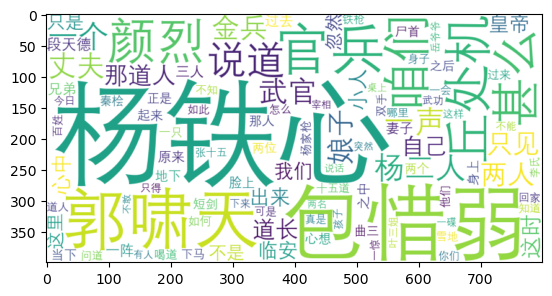

In [9]:
print(novel[0].title)
draw_word_cloud(novel[0])

第02章 江南七怪


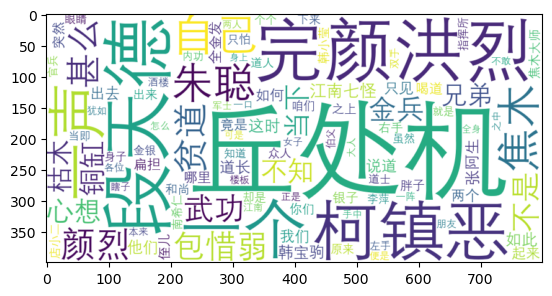

In [10]:
print(novel[1].title)
draw_word_cloud(novel[1])

第03章 大漠风沙


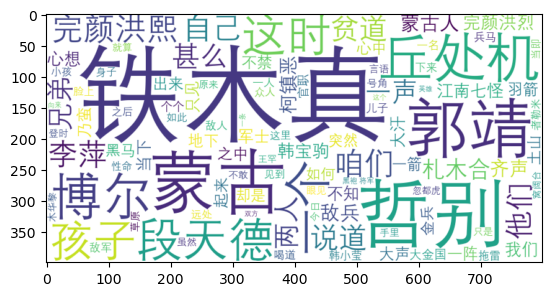

In [11]:
print(novel[2].title)
draw_word_cloud(novel[2])

## 3. 通过继承的方式，进一步扩展Novel和Chapter类，使其支持统计每个章节人物出现次数、检索人物出现上下文

注意：本次作业中一个词上下文定义为该词出现位置前后20个词组成的文本片段。

In [12]:
from collections import defaultdict

class TokenizedChapterWithCharacter(TokenizedChapter):
    
    def __init__(self, title, path, novel_characters, encoding='utf8'):
        """
        ToknizedChapter类对象包含四个属性:
        title: 章节标题，如：第01章 风雪惊变
        content: 章节内容
        tokenized_content: 分词后的内容
        characters: 本章出现的人物的列表
        character_positions: 一个dict，key为人物名称，value为一个list保存本章人物出现的位置（是第几个词）
        """
        super().__init__(title, path, encoding='utf-8') #调用父类构造函数
        # 补完代码，正确的根据novel_characters中的人物信息，初始化characters和character_positions属性
        # 代码补完部分开始
        self._title = title
        self._path = path
        self.charaters = []
        self.character_positions = defaultdict(int)

        with open(self._path, 'rt', encoding='utf-8') as fin:
            self.content = fin.read()
        

        for word in self.tokenized_content:
            if word in novel_characters:
                self.charaters.append(word)
                self.character_positions[word] = self.cut_contents.index(word)

        # 代码补完部分结束
    
    def get_character_count(self, character_name):
        # 请补完以下函数，返回人物在章节中出现的次数
        # 代码补完部分开始
        chapcount = self.word_count()
        return chapcount.get(character_name, 0)

        # 代码补完部分结束
    
    def find_character(self, character_name, k=0):
        # 请补完以下函数，返回人物在该章节第k次出现的上下文，并且在人物名称周围加上*，例如：*郭靖*
        # 代码补完部分开始
        position = -1
        occurrences = -1

        while True:
            try:
                position = self.content.index(character_name, position+1)
                occurrences += 1
                if occurrences == k:
                    start = max(position-20, 0)
                    end = min(position+len(character_name)+20, len(self.content))
                    context = self.content[start: end]
                    context = context.replace(character_name, f"*{character_name}*")
                    return context
                
            except:
                break

        return None

        # 代码补完部分结束
 
        
class TokenizedNovelWithCharacter(TokenizedNovel):
    def __init__(self, title, path, character_file_path, encoding='utf8'):
        """
        TokenizedNovelWithCharacter类对象包含四个属性：
        title：小说标题，如：射雕英雄传
        chapters：小说正文章节
        misc：小说后记、附录等其他章节
        characters：一个list，保存小说中出现的所有人物名称
        """
        # 补完代码，打开保存人物名称的文件，初始化characters属性
        # 代码补完部分开始       
        self._title = title
        self._path, self._encoding = path, encoding
        self.characters = []

        with open(character_file_path, "rt", encoding='utf-8') as file:
            name_content =  file.read()
            name_dict = name_content.split("\n")
        
        self.characters = name_dict

        # 代码补完部分结束
        
        # 初始化jieba分词，并将人物名称作为自定义词加入词典
        jieba.initialize()
        for c in self.characters:
            jieba.add_word(c, freq=1024)
            
        super().__init__(title, path, encoding="utf-8")
            
    # 请补完以下代码，通过重载TokenizedNovel类相应的方法
    # 使得TokenizedNovelWithCharacter类对象的chapters和misc属性下
    # 保存的列表内的元素为TokenizedChapterWithCharacter类对象
    # 代码补完部分开始
        self.chapters, self.misc = self.load_tokenizedchapterswithcharacter()

    def load_tokenizedchapterswithcharacter(self):
        
        chapters, misc = [], []
        filenames = os.listdir(self._path)
        for filename in filenames:
            path = os.path.join(self._path, filename)
            ext = os.path.splitext(path)[1]
            if ext == '.txt':
                if self.is_normal_chapter(path):
                    chapters.append(self.read_chapter_t(path))
                else:
                    misc.append(self.read_chapter_t(path))
            chapters.sort(key=lambda x: x.title)
            misc.sort(key=lambda x: x.title)
       
        return chapters, misc
    
    def read_chapter_t(self, path):
        title = os.path.splitext(os.path.basename(path))[0]
        return TokenizedChapterWithCharacter(title, path, self.characters)

    # 代码补完部分结束
    
    def character_count_in_chapter(self, character_name, chapter_index):
        # 请补完以下函数，返回人物在指定章节中出现的次数
        # 代码补完部分开始
        chapter = self.chapters[chapter_index]
        return chapter.get_character_count(character_name)

        # 代码补完部分结束
        
    def character_count(self, character_name):
        # 请补完以下函数，返回人物在整部小说中出现的次数
        # 代码补完部分开始
        total_count = 0
        for chapter in self.chapters:
            total_count += chapter.get_character_count(character_name)

        return total_count

        # 代码补完部分结束
    
    def find_character_in_chapter(self, character_name, chapter_index, k=0):
        # 请补完以下函数，返回人物在某个章节第k次出现的上下文
        # 代码补完部分开始
        chapter = self.chapters[chapter_index]
        return chapter.find_character(character_name, k)
    
        # 代码补完结束
        
    def find_character(self, character_name, k=0):
        # 请补完以下函数，返回人物在整部小说中第k次出现的上下文,和所在章节
        # 代码补完部分开始
        position = -1
        occurrences = -1
        chapter_index = 0
        # 遍历每个章节
        for chapter in self.chapters:
            chapter_index += 1
            position = -1
            # 在当前章节找人物
            while True:
                try:
                    position = chapter.content.index(character_name, position+1)
                    occurrences += 1

                    if occurrences == k:
                        start = max(0, position-20)
                        end = min(len(chapter.content), position+len(character_name)+20)
                        context = chapter.content[start: end]
                        context = context.replace(character_name, f"*{character_name}*")
                        return context, chapter._title
                    
                except:
                    break

        return None, None

        # 代码补完部分结束        

### 补完上述代码后，请观察下五个Cell的运行结果是否正确：

In [13]:
novel = TokenizedNovelWithCharacter('射雕英雄传', './射雕英雄传/', './射雕英雄传人物.txt', encoding='utf8')
# 输出人物在小说中出现的次数，并从高到低排序
character_counts = sorted(
    [(c, novel.character_count(c)) for c in novel.characters],
    key=lambda x: x[1],
    reverse=True
)
for c, count in character_counts:
    print('{:4} : {}'.format(c, count))


KeyboardInterrupt: 

In [ ]:
# 输出各个人物出现的次数(作业4）
for c in novel.characters:
    print(c, end=',')
    print(
        ','.join(
        str(novel.character_count_in_chapter(c, chap_idx)) for chap_idx in range(len(novel)))
    )

郭靖,2,0,54,68,166,164,156,103,86,59,114,125,84,106,113,161,105,98,64,98,91,123,106,50,73,103,77,91,129,99,70,97,47,150,28,116,165,155,100,139
黄蓉,0,0,0,0,0,0,30,39,95,40,71,197,111,67,75,71,11,76,25,19,208,106,148,58,58,95,52,131,125,139,114,114,50,74,105,61,66,19,57,97
洪七公,0,0,0,0,0,0,0,0,0,0,0,204,2,10,46,4,4,70,78,112,110,127,30,1,7,5,26,6,10,1,3,1,34,30,14,0,1,2,19,83
黄药师,0,0,0,5,0,6,0,0,0,9,8,8,2,66,3,8,13,124,107,1,5,23,1,26,97,102,8,2,2,6,8,0,0,129,40,0,1,1,3,54
周伯通,0,0,0,0,0,0,0,0,0,0,0,3,2,2,0,81,132,13,120,6,2,50,59,1,12,3,1,1,0,3,11,1,23,2,25,0,1,49,47,3
欧阳克,0,0,0,0,0,0,0,8,6,29,22,16,23,0,75,15,0,68,17,28,106,15,0,6,53,3,2,0,0,1,1,1,2,0,0,4,1,0,0,4
欧阳锋,0,0,0,0,0,0,0,0,0,0,0,6,0,0,1,3,9,101,66,80,117,147,37,8,21,26,2,2,0,13,10,0,5,20,63,53,84,67,27,76
梅超风,0,0,0,55,4,54,0,1,0,56,55,1,27,135,2,6,9,2,3,0,0,0,1,1,39,23,1,0,0,1,0,0,1,2,1,0,0,0,0,0
柯镇恶,0,43,16,70,17,32,16,0,0,1,28,0,0,13,2,1,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,27,35,96,27,1,0,0,1
杨康,2,0,0,10,1,1,0,0,1,9,0,0,0,0,16,49,0,

In [ ]:
# 郭靖在各章中出现的次数
c = '郭靖'
print(c, end=',')
print(
    ','.join(
        str(novel.character_count_in_chapter(c, chap_idx)) for chap_idx in range(len(novel))
    )
)

# 郭靖在第一章中第一次出现
print('第一章第一次:...{}...'.format(novel.find_character_in_chapter('郭靖', 0, k=0)))
# 郭靖在第一章中第二次出现
print('第一章第二次:...{}...'.format(novel.find_character_in_chapter('郭靖', 0, k=1)))

# 郭靖在第三章中第一次出现
print('第三章第一次:...{}...'.format(novel.find_character_in_chapter('郭靖', 2, k=0)))
# 郭靖在第三章中第二次出现
print('第三章第二次:...{}...'.format(novel.find_character_in_chapter('郭靖', 2, k=1)))

郭靖,2,0,54,68,166,164,156,103,86,59,114,125,84,106,113,161,105,98,64,98,91,123,106,50,73,103,77,91,129,99,70,97,47,150,28,116,165,155,100,139
第一章第一次:...丘处机微一沉吟，说道：“郭大哥的孩子就叫*郭靖*，杨二哥的孩子叫作杨康，不论男女，都可用...
第一章第二次:...铁心的那柄匕首，在一把短剑的剑柄上刻了“*郭靖*”两字，在另一把短剑上刻了“杨康”两字。...
第三章第一次:...经六岁了。李萍依着丈夫的遗言，替他取名为*郭靖*。
这孩子学话甚慢，有点儿呆头呆脑，直到...
第三章第二次:...无法教你。”
这一年方当十月，天日渐寒，*郭靖*骑了一匹小马，带了牧羊犬出去牧羊。
中午...


In [ ]:
#黄蓉第一次出现
print('{1}: \n...{0}...'.format(*novel.find_character('黄蓉')))

第07章 比武招亲: 
...去哪里？若是回南方，咱们结伴同行如何？”*黄蓉*摇头道：“我不回南方。”忽然说道：“大哥...


In [ ]:
# 东邪西毒北丐南帝第一次出现
print('{1}: \n...{0}...'.format(*novel.find_character('黄药师')))
print('{1}: \n...{0}...'.format(*novel.find_character('欧阳锋')))
print('{1}: \n...{0}...'.format(*novel.find_character('洪七公')))
print('{1}: \n...{0}...'.format(*novel.find_character('一灯大师')))


第04章 黑风双煞: 
...超风是同门师兄妹，两人都是东海桃花岛岛主*黄药师*的弟子，*黄药师*武功自成一派，论到功力之深...
第12章 亢龙有悔: 
...道：“这也未必，大家走着瞧吧，好，老毒物*欧阳锋*的侄儿既要跟你为难，咱们可不能太大意了。...
第12章 亢龙有悔: 
...齐名？
嗯，我爹爹也不老，还不是一般的跟*洪七公*他们平辈论交？定是全真七子这几个老道不争...
第30章 一灯大师: 
...找他，自然不会再说来见段皇爷，必是说来见*一灯大师*。蓉儿真是聪明，一见他面就猜到了。”只听...
